In [1]:
from keras.layers import BatchNormalization

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
%matplotlib inline 
from PIL import Image

import numpy as np
from tqdm import tqdm

2024-02-15 10:30:18.921888: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-15 10:30:20.190947: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 10:30:20.191190: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 10:30:20.459997: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-15 10:30:20.983023: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-15 10:30:25.183031: W tensorflow/compiler/tf2tensorrt/utils/py_utils.

In [2]:
# Каталог с данными для обучения
train_dir = 'DATASET/train'
# Каталог с данными для проверки
val_dir = 'DATASET/validation'
# Каталог с данными для тестирования
test_dir = 'DATASET/test'
# Размеры изображения
img_width, img_height = 512, 256
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 1)
# Размер мини-выборки
batch_size = 16

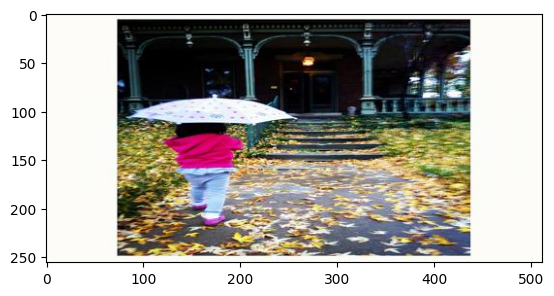

In [3]:
image_file_name = train_dir + '/0/137.jpeg' # without watermark
img = Image.open(image_file_name)
plt.imshow(img)

In [4]:
train_datagen = ImageDataGenerator(rescale=1. / 255,)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 74040 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 24680 images belonging to 2 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 24680 images belonging to 2 classes.


In [7]:
# Deep Learning
model = Sequential()

model.add(Flatten(input_shape=(img_width,img_height,3)))
model.add(BatchNormalization())
model.add(Dense(912, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid')) 

2024-02-15 10:32:02.410496: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1434451968 exceeds 10% of free system memory.
2024-02-15 10:32:03.179100: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1434451968 exceeds 10% of free system memory.
2024-02-15 10:32:03.506599: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1434451968 exceeds 10% of free system memory.


In [8]:
input_shape = (None, 512, 256, 3)
model.build(input_shape) # `input_shape` is the shape of the input data
                         # e.g. input_shape = (None, 32, 32, 3)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 393216)            0         
                                                                 
 batch_normalization (Batch  (None, 393216)            1572864   
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 912)               358613904 
                                                                 
 dropout (Dropout)           (None, 912)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               467456    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                        

In [9]:
#Binary cross entropy of each label. So no really a binary classification problem but
#Calculating binary cross entropy for each label. 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Обучаем модель с использованием генераторов
# train_generator - генератор данных для обучения
# validation_data - генератор данных для проверки

# Need to run with real data to infer shape of different layers
history = model.fit(train_generator,
    steps_per_epoch=2,
    epochs=25,
    validation_data=val_generator,
    validation_steps=1)

Epoch 1/25


2024-02-15 10:32:31.570985: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1434451968 exceeds 10% of free system memory.
2024-02-15 10:32:31.843351: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1434451968 exceeds 10% of free system memory.


2/2 [==============================] - 13s 5s/step - loss: 22.2892 - accuracy: 0.4688 - val_loss: 1.3034 - val_accuracy: 0.2500
Epoch 2/25
2/2 [==============================] - 8s 4s/step - loss: 159.4306 - accuracy: 0.4375 - val_loss: 0.6936 - val_accuracy: 0.5625
Epoch 3/25
2/2 [==============================] - 8s 4s/step - loss: 131.9335 - accuracy: 0.4375 - val_loss: 0.8192 - val_accuracy: 0.5625
Epoch 4/25
2/2 [==============================] - 7s 4s/step - loss: 175.1857 - accuracy: 0.3438 - val_loss: 3.8838 - val_accuracy: 0.6250
Epoch 5/25
2/2 [==============================] - 8s 4s/step - loss: 284.2266 - accuracy: 0.6250 - val_loss: 17.5470 - val_accuracy: 0.4375
Epoch 6/25
2/2 [==============================] - 8s 4s/step - loss: 113.2300 - accuracy: 0.5000 - val_loss: 8.1271 - val_accuracy: 0.7500
Epoch 7/25
2/2 [==============================] - 8s 4s/step - loss: 199.8064 - accuracy: 0.5312 - val_loss: 17.3873 - val_accuracy: 0.4375
Epoch 8/25
2/2 [====================

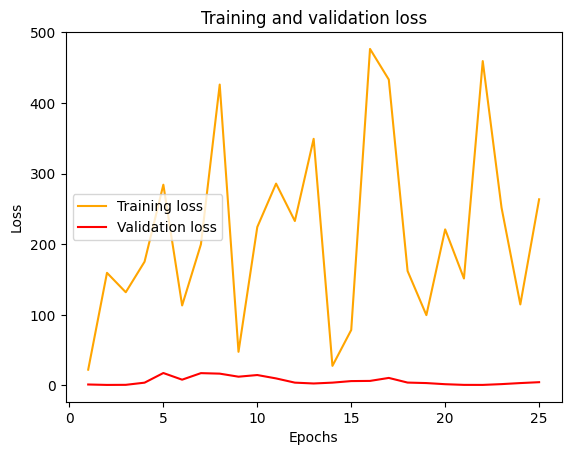

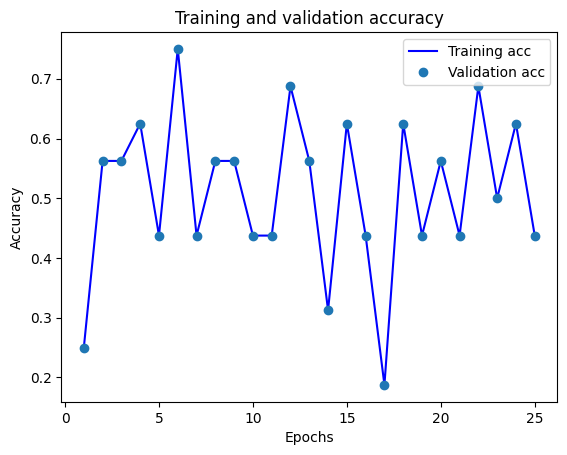

In [11]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['val_accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'blue', label='Training acc')
plt.plot(epochs, val_acc, 'o', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
scores = model.evaluate_generator(test_generator, 50)
print("\nТочность на тестовых данных: %.2f%%" % (scores[1]*100))

/tmp/ipykernel_38017/1911456542.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, 50)



Точность на тестовых данных: 49.63%


1/1 [==============================] - 0s 78ms/step
1


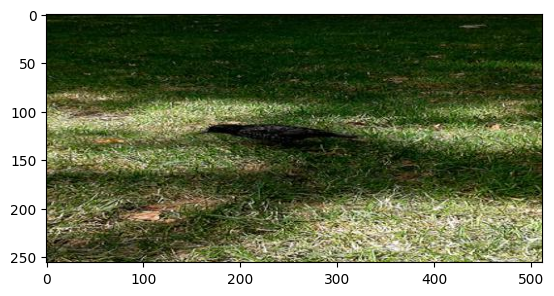

In [27]:
from tensorflow.keras.preprocessing import image
# predict for my data
new_path = './testimgs/99997.jpeg'
image_result=Image.open(new_path)

img_width,img_height = 512, 256 # как при тренировке исходной модели

def data_resizing_process(dirs):
    datas = image.load_img(dirs, target_size = (img_width,img_height))
    res = image.img_to_array(datas)
    res = np.expand_dims(res, axis = 0)
    res /= 255
    return res

# img = image.load_img(new_path, target_size=(img_width,img_height,3))
# img = image.img_to_array(img)
# img = np.expand_dims(img, axis=0)
# img = img/255.

img = data_resizing_process(new_path)
result = model.predict(img)
print(np.argmax(result))

image_result=plt.imshow(image_result)
#plt.title(Categories[np.argmax(result)])
plt.show()

In [14]:
model.save('fully_connected_classificator.keras')